### Primer aproximación para la descomposicion en valores singulares de espectros Raman

Primeramente se propone una lectura de espectros Raman, estos serán objectos de la clase RamanSpectra

In [21]:
# Objetivo : Empaquetar los espectros Raman en un Array para su decomposición en valores singulares
# 
# El cálculo debe realizarse con la matriz M y la transpuesta MT

import matplotlib.pyplot as plt
import os

# Definimos la Clase base "RamanSpectra" que debera contener información relacionada con la medicion
# TODO: Podemos añadir un mapeo de intensidades para caracterizar la superficie de medicion
# TODO: Añadir otros parametros de informacion para la muestra o espectro

class RamanSpectra(object):

    def __init__(self,data,info):
        self.data = data
        self.info = info
        self.x = self.data[0]
        self.y = self.data[1]
        return;



### La clase RamanSpectraGroup colecta todos los espectros Raman en una carpeta definida

In [22]:

class RamanSpectraGroup(object):

    def __init__(self):
        # Un Grupo de espectros Raman será una lista de Objectos RamanSpectra
        # con los atributos de info y data, inicialmente el atributo spectra es una lista vacía

        # TODO: Es posible añadir una opcion que distinga cuando un espectro ya ha sido añadido al grupo de
        # espectros Raman
        
        self.ramanSpectra = []
        return;

    def getFromFolder(self, folder):
        # NOTE: Este método no verifica si los archivos en el folder seleccionado ya se encuentran en self.spectra
        # el método construye una lista de archivos en el directorio seleccionado y llama al método
        # getDetailedSpectra con una lista que pasa a su argumento (self.files)
        self.folder = '/' + folder
        self.path   = os.getcwd()
        # TODO: Verificar si es posible discriminar con - if file in files - para evitar la duplicacion de archivos
        self.files  = [ self.path + self.folder + '/' + f for f in os.listdir(self.path + self.folder)]
        self.getDetailedSpectra(self.files)
        return;

    def getDetailedSpectra(self, targets):
        for file in targets:
            with open(file, 'r', encoding = 'unicode_escape') as tempfile:
                content = tempfile.read()
                info    = content.split('#Acquired')[1].split('\n')[0].replace("=\t",'')
                values  = content.split('#Acquired')[1].split('\n')[1:-1]
                spx=[]
                spy=[]
                for string_values in values:
                    try:
                        x = float(string_values.split('\t')[0])
                        y = float(string_values.split('\t')[1])
                    except:
                        print('Ocurrio un error al hacer la lectura de los archivos')
                    spx.append(x)
                    spy.append(y)
                self.ramanSpectra.append(RamanSpectra((spx,spy), info ))
        return;
    
    def returnMatrix(self, intt, xy = 1):
        ls = []
        for raman in self.ramanSpectra:
            ls.append(raman.data[xy])
        return ls;

In [23]:
rgroup = RamanSpectraGroup()
rgroup.getFromFolder('datosramana')
rgroup.getFromFolder('datosramanb')
rgroup.getFromFolder('datosramanc')

In [26]:
for spectra in rgroup.ramanSpectra:
    

2646.0
2336.0
2628.0
2366.0
2778.0
2640.0
2420.0
1630.0
2776.0
2566.0
2678.0
2950.0
2876.0
2658.0
2630.0
2256.0
2832.0
2612.0
2660.0
2694.0
2196.0
2806.0
2616.0
1394.0
2738.0
1394.0


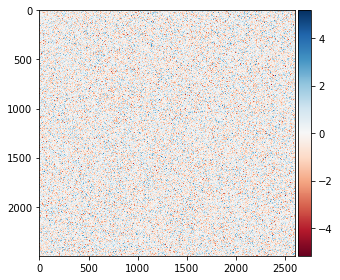

In [31]:
from skimage import io
import numpy as np
data=np.random.randn(2500,2600)
io.imshow(data)

In [33]:
data.shape

(2500, 2600)